# 1. Introdução
**Problema de Negócio**<br>
A rotatividade de clientes (churn) é um problema crítico para muitas empresas, pois a aquisição de novos clientes costuma ser mais cara do que a retenção dos existentes. Prever quais clientes têm maior probabilidade de cancelar seus serviços permite à empresa tomar medidas proativas para melhorar a retenção.<br>
**Objetivos**<br>
Entender os fatores que contribuem para o churn.<br>
Identificar os clientes que têm maior probabilidade de churn.<br>
Desenvolver um modelo de machine learning para prever churn.<br>

# 2. Importando Bibliotecas

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# 3. Analisando Estrutura do Dataset

In [88]:
df = pd.read_csv('C:/DataSets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [90]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x + '.0' if '.' not in x else x)

In [91]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

# 4. Análise Exploratória

## 4.1 Análise Univariada

In [80]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

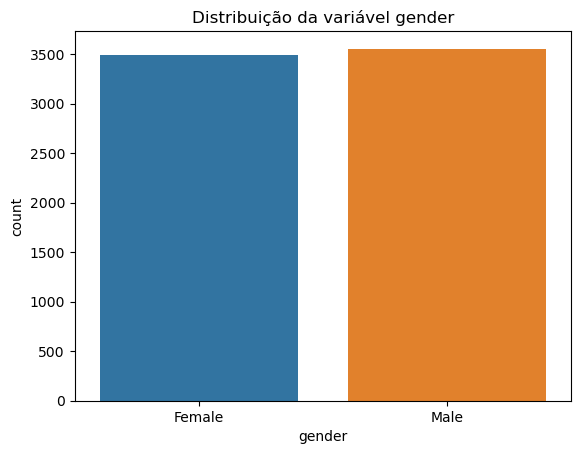

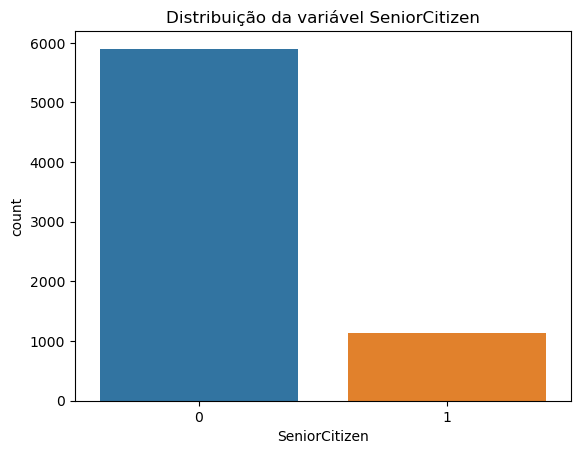

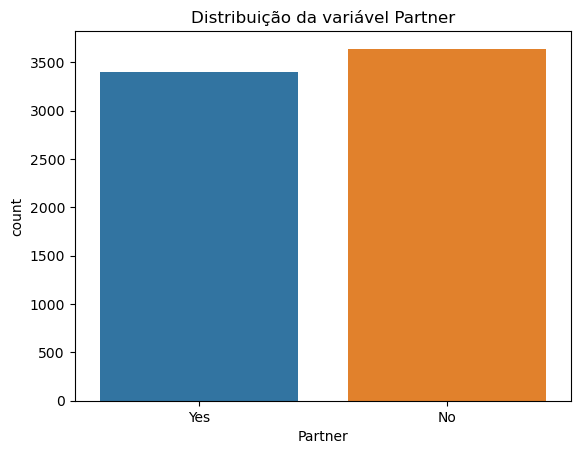

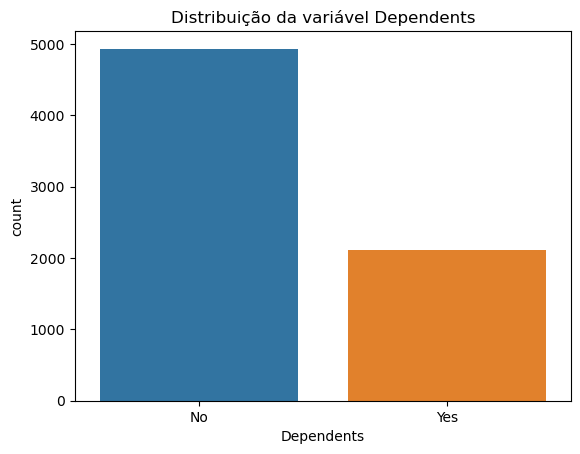

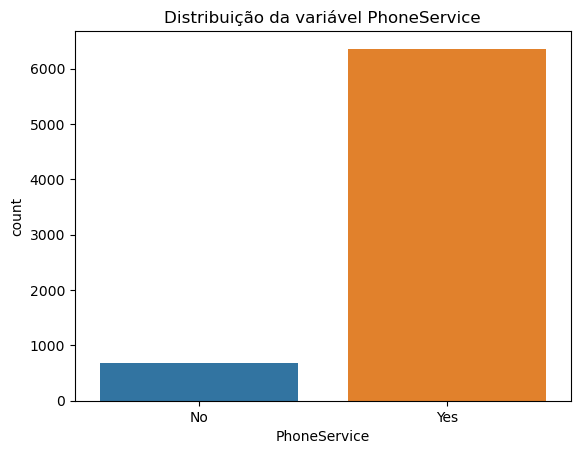

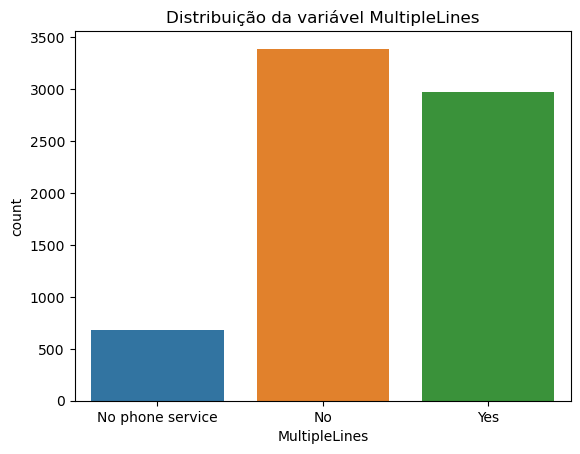

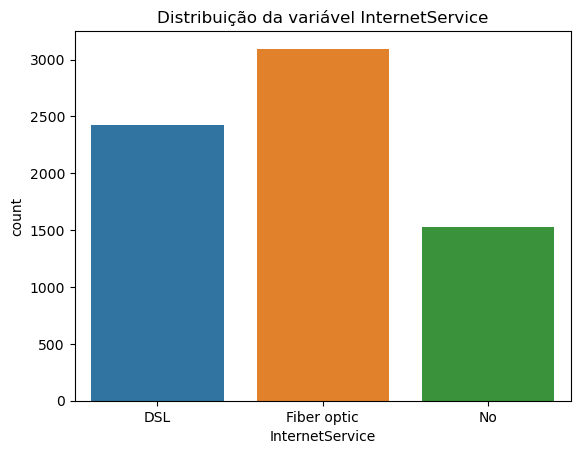

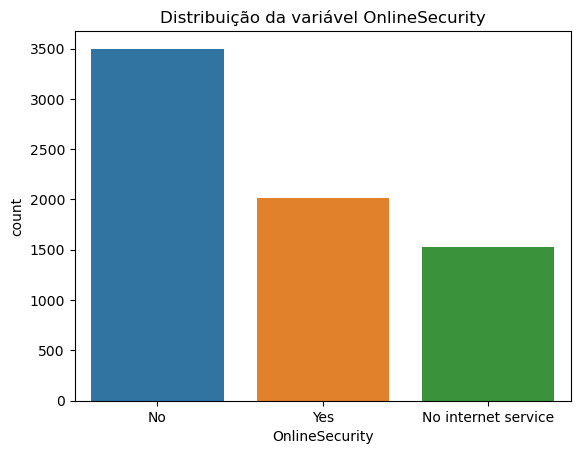

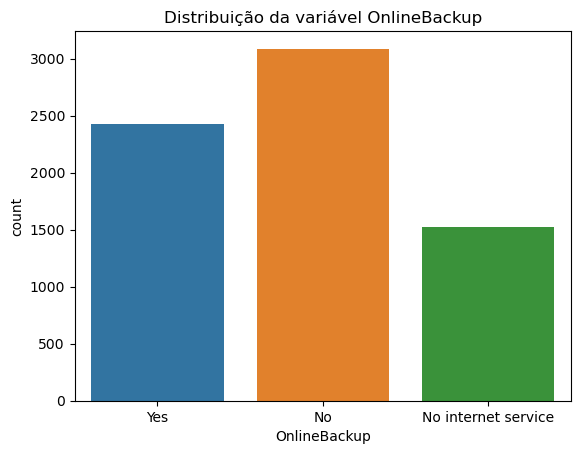

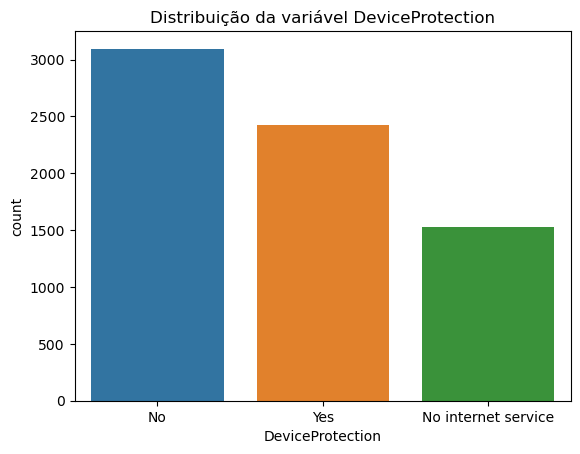

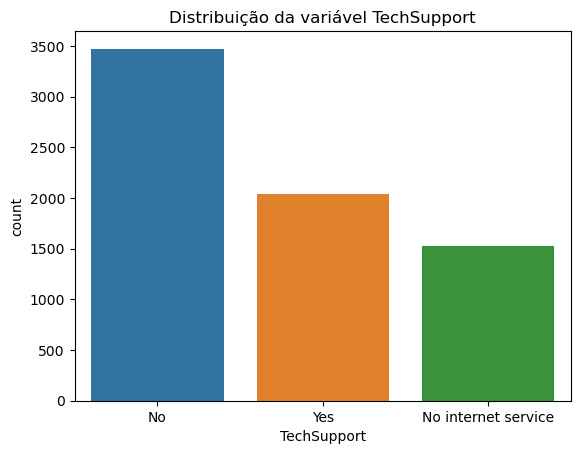

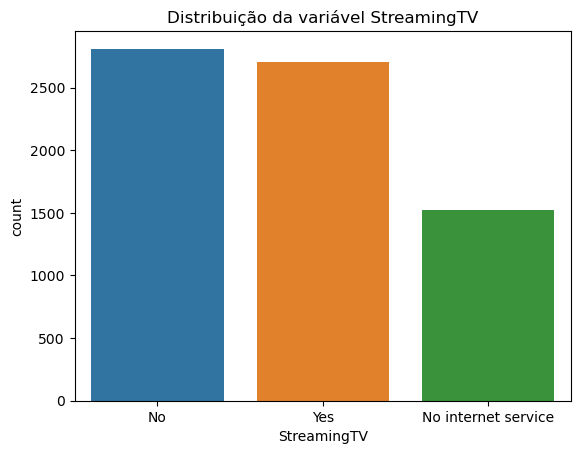

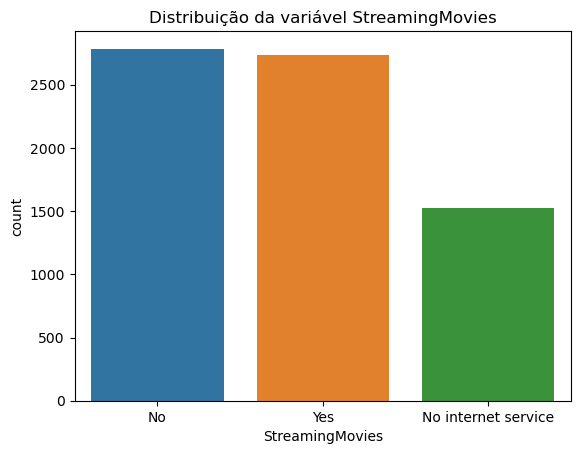

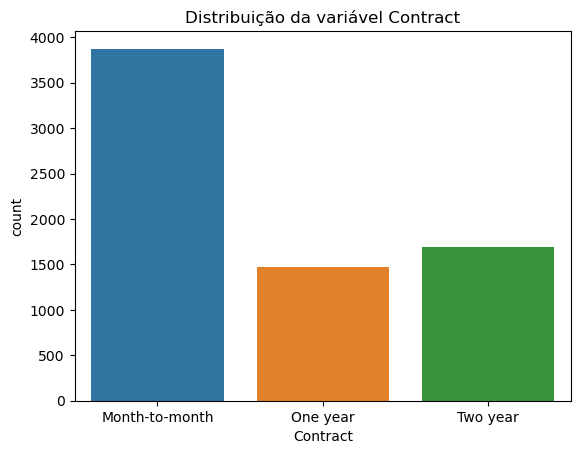

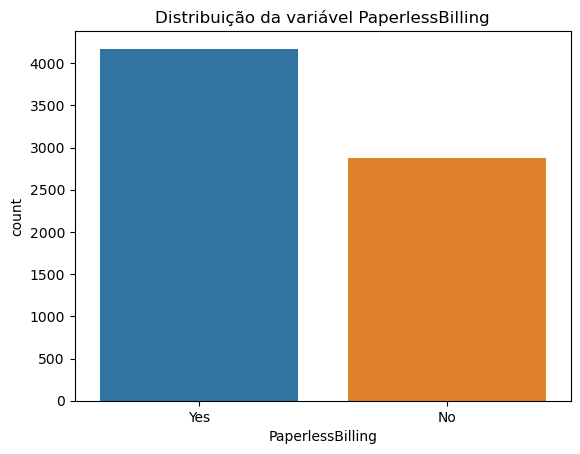

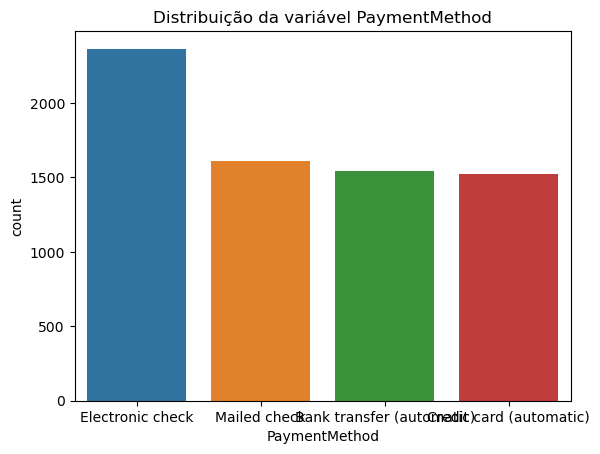

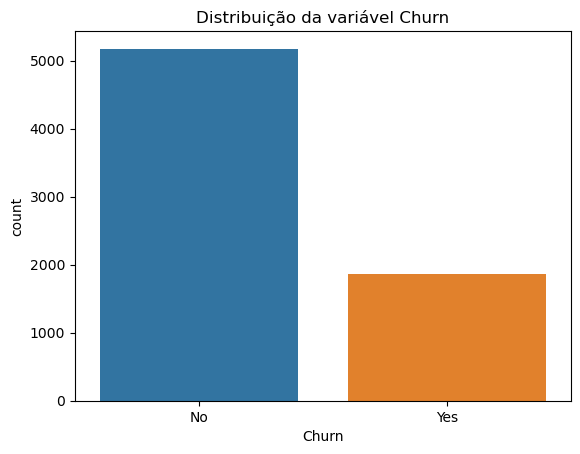

In [81]:
for col in categorical:
    sns.countplot(x = col, data = df)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

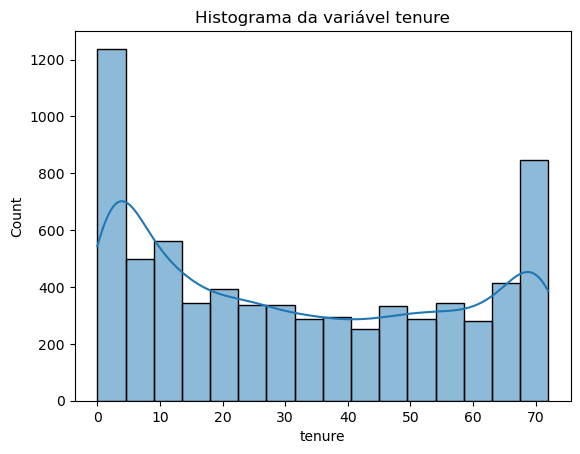

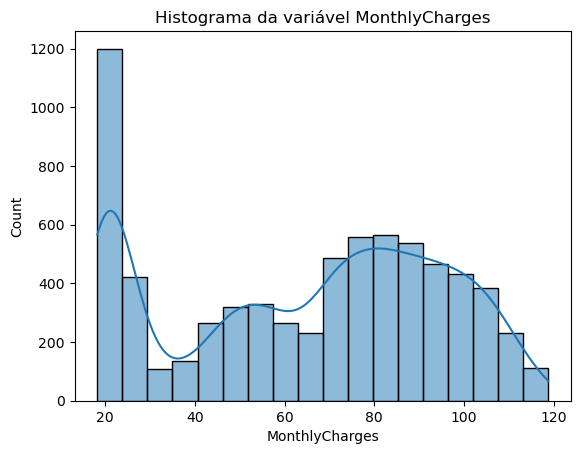

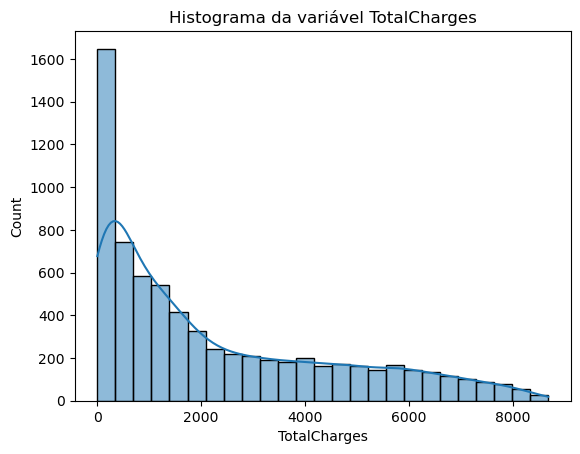

In [77]:
for col in numerical:
    sns.histplot(x = col, data = df, kde = True)
    plt.title(f'Histograma da variável {col}')
    plt.show()

## 4.2 Análise Bivariada

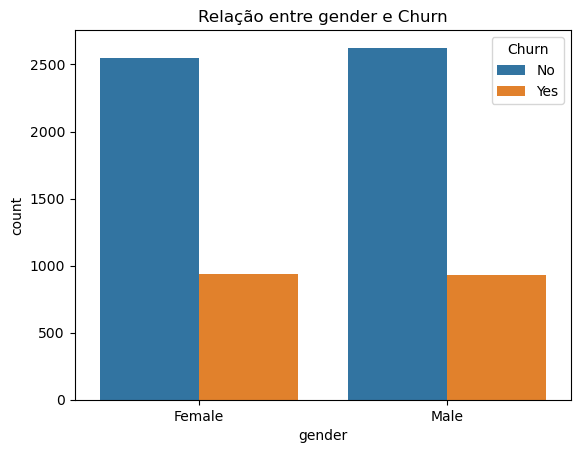

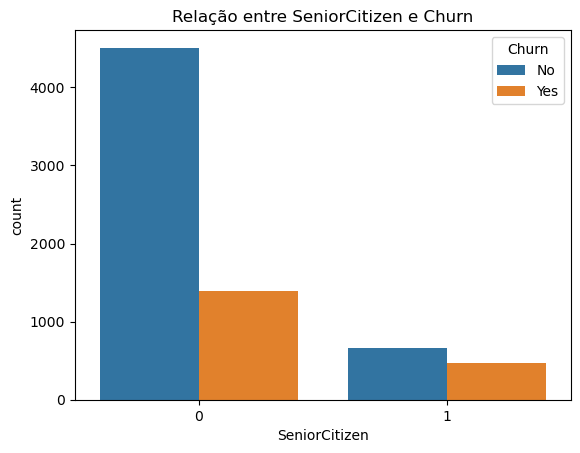

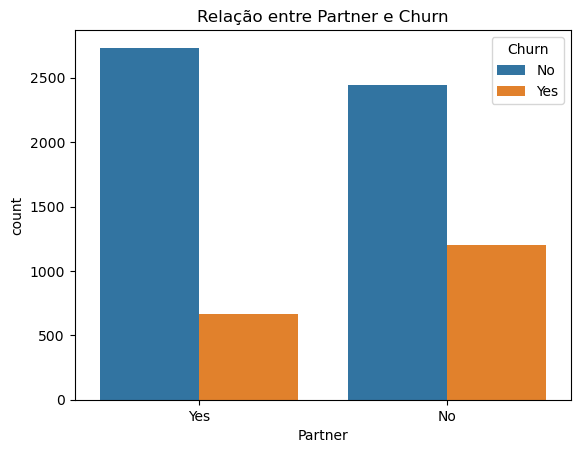

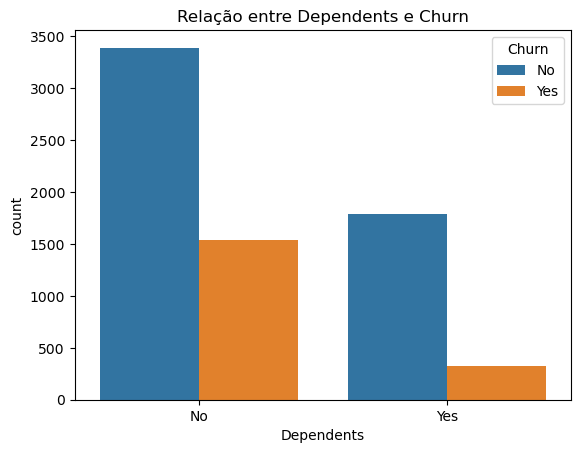

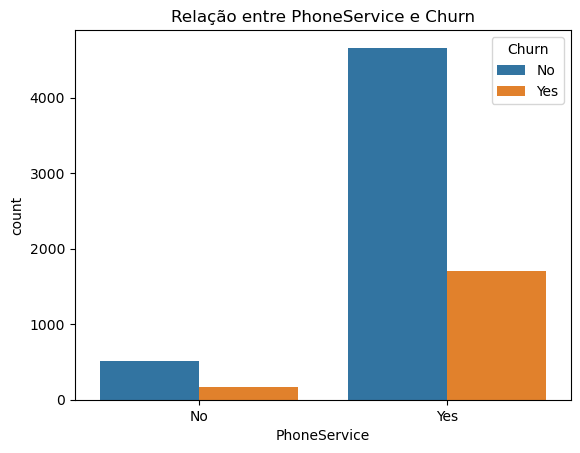

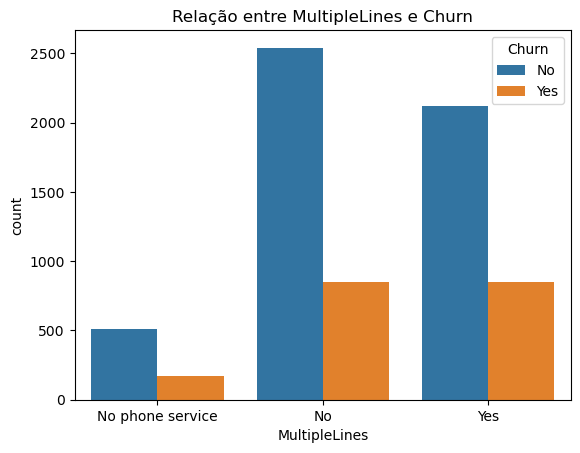

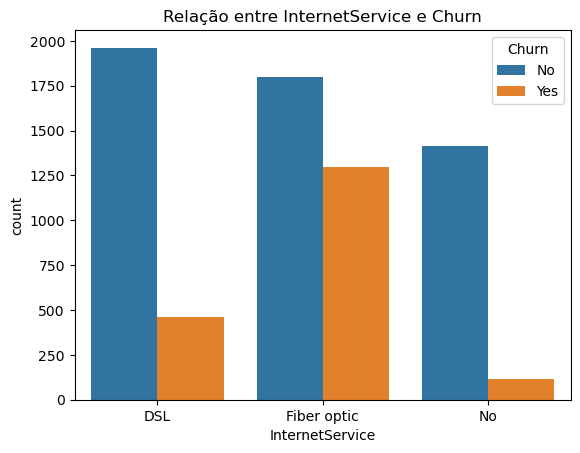

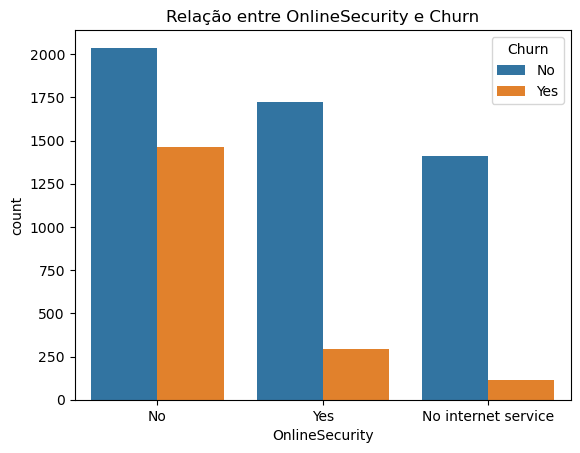

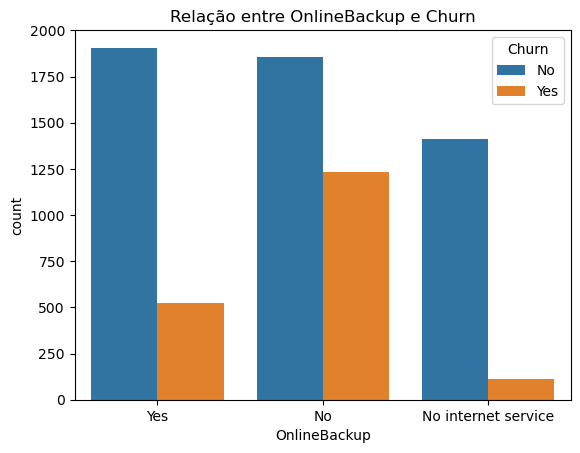

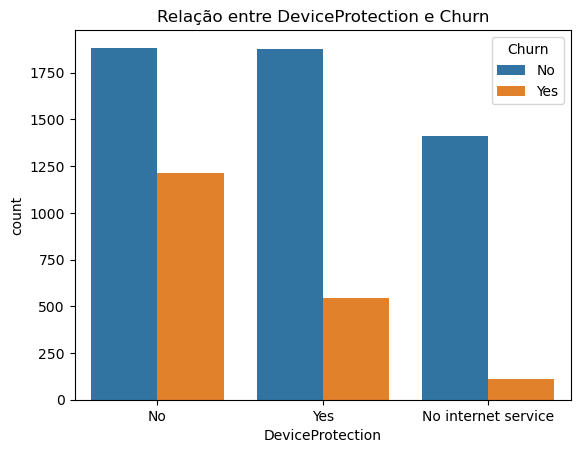

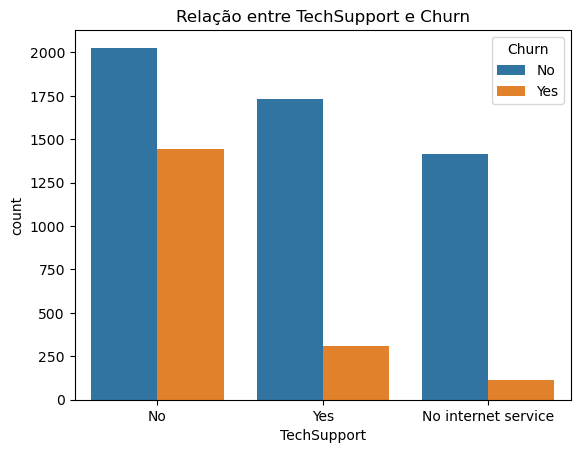

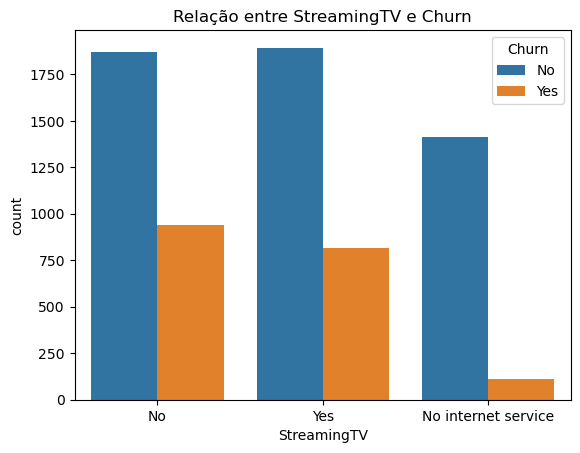

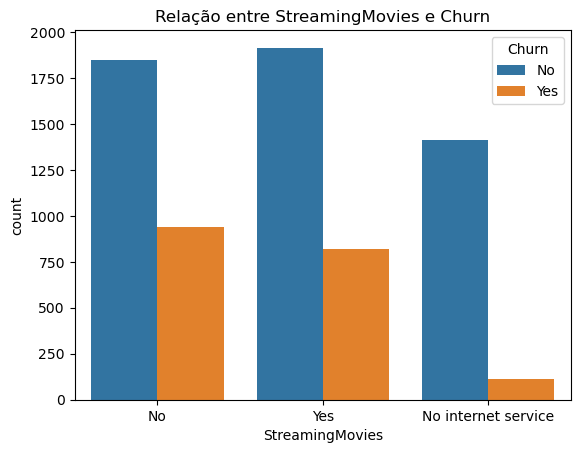

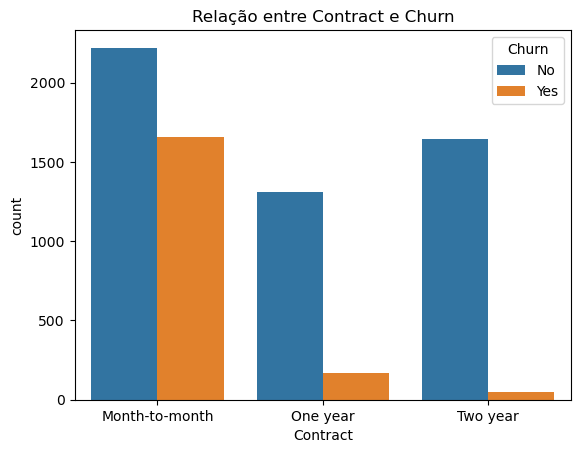

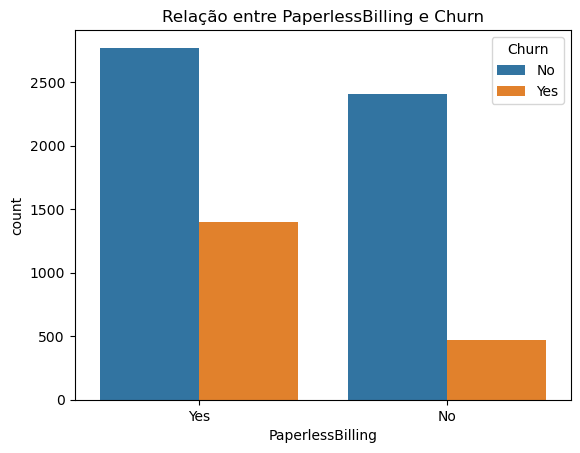

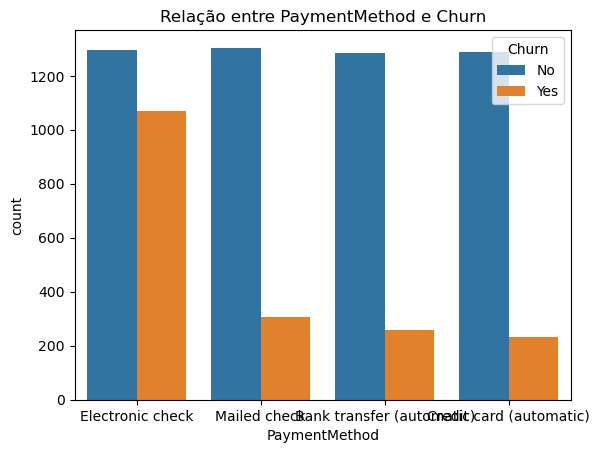

In [82]:
for col in categorical:
    if col != 'Churn':
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'Relação entre {col} e Churn')
        plt.show()

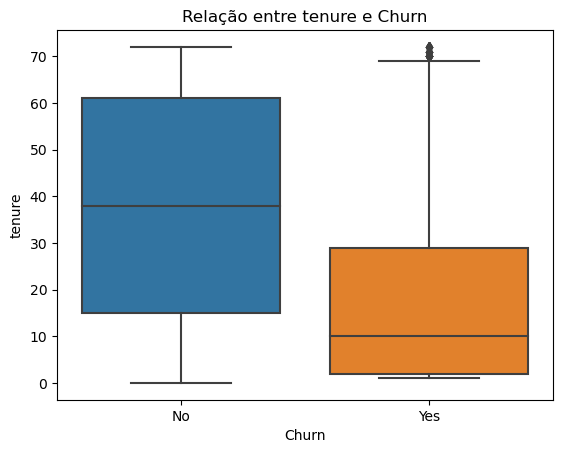

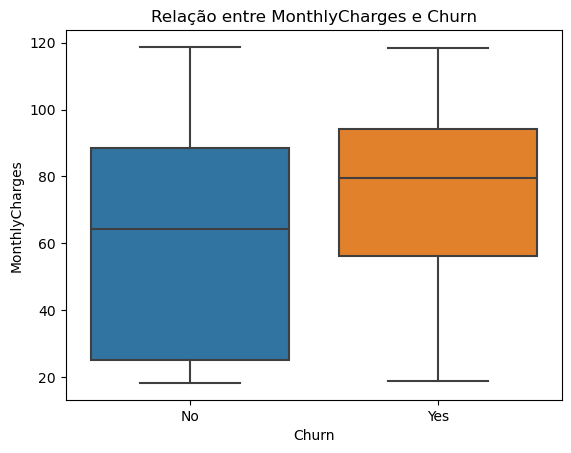

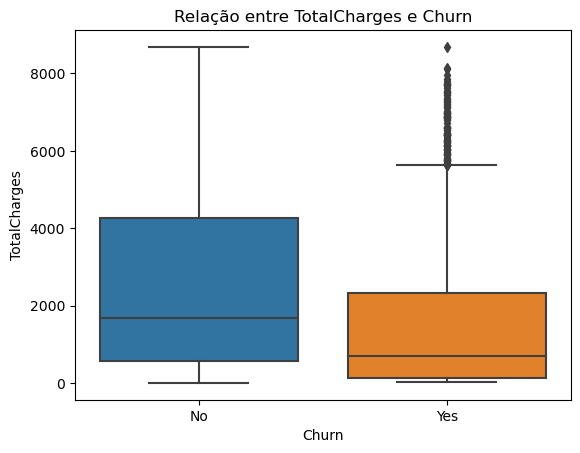

In [83]:
for col in numerical:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Relação entre {col} e Churn')
    plt.show()

## 4.3 Análise de Correlação

In [92]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [98]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [95]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [99]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [101]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [104]:
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 2, 'Yes': 1, 'No': 0})

In [106]:
df['InternetService'] = df['InternetService'].map({'Fiber optic': 2, 'DSL': 1, 'No': 0})

In [108]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [111]:
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [117]:
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [119]:
df['TechSupport'] = df['TechSupport'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [121]:
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [123]:
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [125]:
df['Contract'] = df['Contract'].map({'Month-to-month': 2, 'One year': 1, 'Two year': 0})

In [127]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [129]:
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0})

In [133]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [149]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.396713
InternetService     0.316846
PaymentMethod       0.262818
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198324
StreamingTV        -0.205742
StreamingMovies    -0.207256
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Name: Churn, dtype: float64

# 5. Treinando Modelo de Machine Learning

In [225]:
X = np.array(df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']])

y = np.array(df['Churn'])

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 5.1 Linear Regression

In [278]:
modelLR = LinearRegression()

In [279]:
modelLR.fit(X_train, y_train)

LinearRegression()

In [280]:
modelLR.score(X_test, y_test)

0.25325371329478863

# 5.2 Random Forest

In [281]:
modelRF = RandomForestClassifier(n_estimators = 500)

In [282]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [283]:
modelRF.score(X_test, y_test)

0.7757274662881476

In [292]:
y_pred = modelRF.predict(X_test)

In [293]:
confusion_matrix(y_test, y_pred)

array([[904, 128],
       [188, 189]], dtype=int64)

# 5.3 Gradient Boosting

In [284]:
modelGB = GradientBoostingClassifier(n_estimators = 500)

In [285]:
modelGB.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [286]:
modelGB.score(X_test, y_test)

0.78708303761533

In [296]:
y_pred = modelGB.predict(X_test)

In [297]:
confusion_matrix(y_test, y_pred)

array([[904, 128],
       [172, 205]], dtype=int64)

# 6. Conclusão
Obtivemos dois modelos de machine learning com uma boa acurácia o Random Forest e Gradient Boosting, ambos são modelos de classificação, para nosso dataset o modelo de Linear Regression não teve um desempenho bom pois as variáveis não tem uma correlação alta sendo que o que mais impacta em um Churn é o contrato que o cliente faz mas isso não é o suficente para explicar os Churn.